# Getting Started with NLP : Hands-on-01

This notebook covers some of basic steps involved in preparing text data for NLP processing. This notebook covers:
+ Exploratory analysis of a text dataset. We will understand how to calculate size of corpus, number of words, their distribution and so on
+ Briefly touch upon text wrangling steps such as newline, whitespace removal, handling stop-words and so on
+ Briefly touch upon basic text representation methods such as Bag of Words model using Term Frequency and TF-IDF.


Note: This is just an overview and not an exhaustive material on text preprocessing


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/raghavbali/nlp_starterpack_webinar/blob/main/notebooks/getting_started_with_nlp_handson_1.ipynb
)

### Setup Dependencies

In [1]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import gutenberg
import seaborn as sns
import re

%matplotlib inline
pd.options.display.max_columns=10000

In [2]:
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load and Analyze Dataset

In [3]:
shakespeare = gutenberg.open('shakespeare-hamlet.txt')
shakespeare = shakespeare.readlines()

shakespeare[:5]

['[The Tragedie of Hamlet by William Shakespeare 1599]\n',
 '\n',
 '\n',
 'Actus Primus. Scoena Prima.\n',
 '\n']

In [4]:
print("Total lines in the book/corpus={}".format(len(shakespeare)))

Total lines in the book/corpus=4922


### Remove Blank Lines

In [5]:
shakespeare = list(filter(None, [item.strip('\n') 
                               for item in shakespeare]))
shakespeare[:5]

['[The Tragedie of Hamlet by William Shakespeare 1599]',
 'Actus Primus. Scoena Prima.',
 'Enter Barnardo and Francisco two Centinels.',
 "  Barnardo. Who's there?",
 '  Fran. Nay answer me: Stand & vnfold']

In [6]:
print("Updated lines in the book/corpus={} after removing blank lines".format(len(shakespeare)))

Updated lines in the book/corpus=3966 after removing blank lines


### Plot Sentence Length Distribution

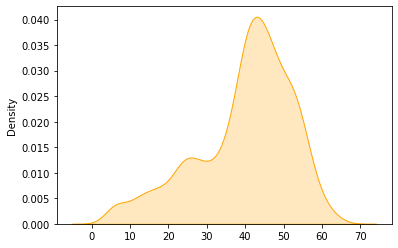

In [7]:
line_lengths = [len(sentence) for sentence in shakespeare]
p = sns.kdeplot(line_lengths, shade=True, color='orange')

### Tokensize Sentences into words

In [8]:
# splitting each sentence to get words
tokens = [item.split() for item in shakespeare]
print(tokens[:5])

[['[The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599]'], ['Actus', 'Primus.', 'Scoena', 'Prima.'], ['Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels.'], ['Barnardo.', "Who's", 'there?'], ['Fran.', 'Nay', 'answer', 'me:', 'Stand', '&', 'vnfold']]


### Token Count Distribution per Sentence

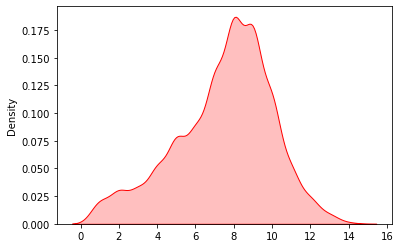

In [9]:
total_tokens_per_line = [len(sentence.split()) for sentence in shakespeare]
p = sns.kdeplot(total_tokens_per_line, shade=True, color='red')

## Basic Preprocessing

+ Keep only alphabets (remove numbers and special characters
+ Remove Stopwords

In [10]:
words = [word for sentence in tokens for word in sentence]
print(words[:20])

['[The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599]', 'Actus', 'Primus.', 'Scoena', 'Prima.', 'Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels.', 'Barnardo.', "Who's"]


In [11]:
# only keeping words and removing special characters
words = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for word in words]))
print(words[:20])

['The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', 'Barnardo', 'Whos', 'there']


### Top Occuring Words

In [12]:
from collections import Counter

words = [word.lower() for word in words]
c = Counter(words)
c.most_common(10)

[('the', 993),
 ('and', 862),
 ('to', 683),
 ('of', 610),
 ('i', 547),
 ('you', 522),
 ('my', 502),
 ('a', 497),
 ('it', 415),
 ('in', 384)]

### Top Occuring Words after **Stop-word Removal**

In [13]:
import nltk 

stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
words = [word.lower() for word in words if word not in stopwords]
c = Counter(words)
c.most_common(10)

[('ham', 337),
 ('lord', 212),
 ('haue', 175),
 ('king', 171),
 ('shall', 107),
 ('thou', 105),
 ('come', 104),
 ('hamlet', 100),
 ('good', 98),
 ('hor', 95)]

## Utility Function for Preprocessing

In [15]:
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stopwords]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [16]:
normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(shakespeare)
norm_corpus

array(['tragedie hamlet william shakespeare', 'actus primus scoena prima',
       'enter barnardo francisco two centinels', ...,
       'exeunt marching peale ordenance shot', '',
       'finis tragedie hamlet prince denmarke'], dtype='<U58')

## Text Representation Methods

### Bag of Words : Term Frequency

A simple vector space representational model for text data. A vector space model is simply a mathematical model for transforming text as numeric vectors, such that each dimension of the vector is a specific feature\attribute. The bag of words model represents each text document as a numeric vector where each dimension(column) is a specific word from the vocabulary and the value could be its frequency in the document. The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
cv_matrix.shape

(3966, 4689)

In [20]:
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

abhominably  abhorred  abilitie  aboord  aboue  abridgements  abroad  \
0               0         0         0       0      0             0       0   
1               0         0         0       0      0             0       0   
2               0         0         0       0      0             0       0   
3               0         0         0       0      0             0       0   
4               0         0         0       0      0             0       0   
...           ...       ...       ...     ...    ...           ...     ...   
3961            0         0         0       0      0             0       0   
3962            0         0         0       0      0             0       0   
3963            0         0         0       0      0             0       0   
3964            0         0         0       0      0             0       0   
3965            0         0         0       0      0             0       0   

      absent  absolute  abstinence  abstracts  absurd  abusd  abuse  abuses  \
0          0         0           0          0       0      0      0       0   
1          0         0           0          0       0      0      0       0   
2          0         0           0          0       0      0      0       0   
3          0         0           0          0       0      0      0       0   
4          0         0           0          0       0      0      0       0   
...      ...       ...         ...        ...     ...    ...    ...     ...   
3961       0         0           0          0       0      0      0       0   
3962       0         0           0          0       0      0      0       0   
3963       0         0           0          0       0      0      0       0   
3964       0         0           0          0       0      0      0       0   
3965       0         0           0          0       0      0      0       0   

      accent  accepts  accesse  accident  accidentall  accord  according  \
0          0        0        0         0            0       0          0   
1          0        0        0         0            0       0          0   
2          0        0        0         0            0       0          0   
3          0        0        0         0            0       0          0   
4          0        0        0         0            0       0          0   
...      ...      ...      ...       ...          ...     ...        ...   
3961       0        0        0         0            0       0          0   
3962       0        0        0         0            0       0          0   
3963       0        0        0         0            0       0          0   
3964       0        0        0         0            0       0          0   
3965       0        0        0         0            0       0          0   

      account  accounted  accurst  accuse  acquaint  acquire  acquittance  \
0           0          0        0       0         0        0            0   
1           0          0        0       0         0        0            0   
2           0          0        0       0         0        0            0   
3           0          0        0       0         0        0            0   
4           0          0        0       0         0        0            0   
...       ...        ...      ...     ...       ...      ...          ...   
3961        0          0        0       0         0        0            0   
3962        0          0        0       0         0        0            0   
3963        0          0        0       0         0        0            0   
3964        0          0        0       0         0        0            0   
3965        0          0        0       0         0        0            0   

      acrosse  act  acte  acted  acting  action  actions  actiuely  actor  \
0           0    0     0      0       0       0        0         0      0   
1           0    0     0      0       0       0        0         0      0   
2           0    0     0      0       0       0    

### TF-IDF
Using absolute frequency counts as a measure of importance has its shortcomings. One potential issue is that there might be some terms which occur frequently across all documents and these may tend to overshadow other terms in the feature set. The TF-IDF model tries to combat this issue by using a normalizing factor. TF-IDF or Term Frequency-Inverse Document Frequency, uses a combination of two metrics in its computation, namely: **term frequency (tf)** and **inverse document frequency (idf)**. 

Mathematically, we can define TF-IDF as 

```TF-IDF = tf x idf```


Where, each element in the **TF-IDF** matrix is the score for word **w **in document **D**.

+ The term tf(w, D) represents the term frequency of the word *w* in document *D*, which can be obtained from the Bag of Words model.
+ The term idf(w, D) is the inverse document frequency for the term *w*, which can be computed as the ```log``` transform of the total number of documents in the corpus *C* divided by the *document frequency of the word w*, in other words it is the frequency of documents in the corpus where the word w occurs.


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

abhominably  abhorred  abilitie  aboord  aboue  abridgements  abroad  \
0             0.0       0.0       0.0     0.0    0.0           0.0     0.0   
1             0.0       0.0       0.0     0.0    0.0           0.0     0.0   
2             0.0       0.0       0.0     0.0    0.0           0.0     0.0   
3             0.0       0.0       0.0     0.0    0.0           0.0     0.0   
4             0.0       0.0       0.0     0.0    0.0           0.0     0.0   
...           ...       ...       ...     ...    ...           ...     ...   
3961          0.0       0.0       0.0     0.0    0.0           0.0     0.0   
3962          0.0       0.0       0.0     0.0    0.0           0.0     0.0   
3963          0.0       0.0       0.0     0.0    0.0           0.0     0.0   
3964          0.0       0.0       0.0     0.0    0.0           0.0     0.0   
3965          0.0       0.0       0.0     0.0    0.0           0.0     0.0   

      absent  absolute  abstinence  abstracts  absurd  abusd  abuse  abuses  \
0        0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   
1        0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   
2        0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   
3        0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   
4        0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   
...      ...       ...         ...        ...     ...    ...    ...     ...   
3961     0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   
3962     0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   
3963     0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   
3964     0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   
3965     0.0       0.0         0.0        0.0     0.0    0.0    0.0     0.0   

      accent  accepts  accesse  accident  accidentall  accord  according  \
0        0.0      0.0      0.0       0.0          0.0     0.0        0.0   
1        0.0      0.0      0.0       0.0          0.0     0.0        0.0   
2        0.0      0.0      0.0       0.0          0.0     0.0        0.0   
3        0.0      0.0      0.0       0.0          0.0     0.0        0.0   
4        0.0      0.0      0.0       0.0          0.0     0.0        0.0   
...      ...      ...      ...       ...          ...     ...        ...   
3961     0.0      0.0      0.0       0.0          0.0     0.0        0.0   
3962     0.0      0.0      0.0       0.0          0.0     0.0        0.0   
3963     0.0      0.0      0.0       0.0          0.0     0.0        0.0   
3964     0.0      0.0      0.0       0.0          0.0     0.0        0.0   
3965     0.0      0.0      0.0       0.0          0.0     0.0        0.0   

      account  accounted  accurst  accuse  acquaint  acquire  acquittance  \
0         0.0        0.0      0.0     0.0       0.0      0.0          0.0   
1         0.0        0.0      0.0     0.0       0.0      0.0          0.0   
2         0.0        0.0      0.0     0.0       0.0      0.0          0.0   
3         0.0        0.0      0.0     0.0       0.0      0.0          0.0   
4         0.0        0.0      0.0     0.0       0.0      0.0          0.0   
...       ...        ...      ...     ...       ...      ...          ...   
3961      0.0        0.0      0.0     0.0       0.0      0.0          0.0   
3962      0.0        0.0      0.0     0.0       0.0      0.0          0.0   
3963      0.0        0.0      0.0     0.0       0.0      0.0          0.0   
3964      0.0        0.0      0.0     0.0       0.0      0.0          0.0   
3965      0.0        0.0      0.0     0.0       0.0      0.0          0.0   

      acrosse  act  acte  acted  acting  action  actions  actiuely  actor  \
0         0.0  0.0   0.0    0.0     0.0     0.0      0.0       0.0    0.0   
1         0.0  0.0   0.0    0.0     0.0     0.0      0.0       0.0    0.0   
2         0.0  0.0   0.0    0.0     0.0     0.0    